# [DELightcurveSimulation](https://github.com/samconnolly/DELightcurveSimulation)

In [ ]:
!echo $PATH

In [ ]:
!type python

/Users/lyubing/opt/anaconda2/bin/python

In [ ]:
ls /Users/lyubing/opt/anaconda3/envs/py2/share/jupyter/kernels/python2

In [ ]:
cat /Users/lyubing/opt/anaconda3/envs/py2/share/jupyter/kernels/python2/kernel.json

In [ ]:
!{sys.executable} -m pip install numpy

In [ ]:
ls /Users/lyubing/opt/anaconda2/lib/python2.7/site-packages

In [ ]:
import sys
print(sys.executable)

In [1]:
pwd

u'/Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM'

In [ ]:
import os
#os.chdir('/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/')
pwd_path='/Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM'

In [ ]:
cat DELCgen.py

In [2]:
#------- Input parameters -------
import scipy.stats as st
from DELCgen import *

In [3]:
Plot_Lightcurve() - Plot the lightcurve
Plot_Periodogram() - Plot the lightcurve's periodogram, and PSD model if fitted
Plot_PDF() - Plot the lightcurve's probability density function, and PDF model if fitted
Plot_Stats() - Plot the lightcurve, its periodogram and PDF, and PSD and PDF models if fitted

SyntaxError: invalid syntax (<ipython-input-3-a56fe2e493b0>, line 1)

Read 1170 lines of data


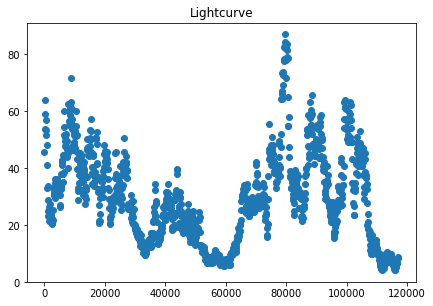

In [4]:
# File Route
route = "/Users/lyubing/Downloads/Timing/DELightcurveSimulation/"
datfile = "NGC4051.dat"

# Bending power law params
A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0 
# Probability density function params
kappa,theta,lnmu,lnsig,weight = 5.67, 5.96, 2.14, 0.31,0.82
# Simulation params
RedNoiseL,RandomSeed,aliasTbin, tbin = 100,12,1,100 

#--------- Commands ---------------

# load data lightcurve
datalc = Load_Lightcurve(route+datfile,tbin)

# plot the data lightcurve and its PDF and PSD
datalc.Plot_Lightcurve()

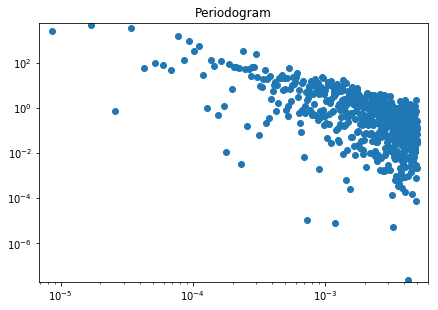

In [5]:
datalc.Plot_Periodogram()

/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


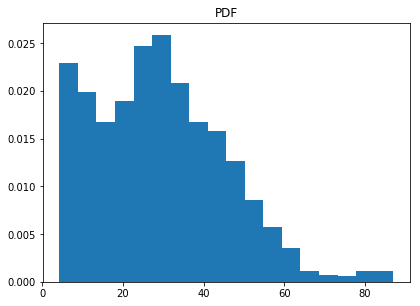

In [6]:
datalc.Plot_PDF()

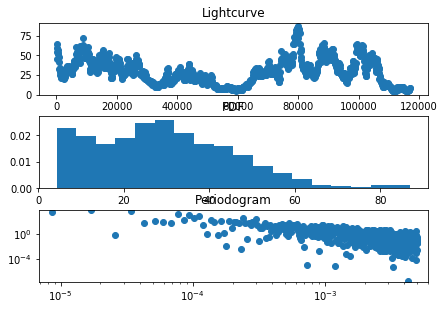

In [7]:
datalc.Plot_Stats()

In [8]:
BendingPL

<function DELCgen.BendingPL>

In [9]:
# estimate underlying variance od data light curve
datalc.STD_Estimate()

Fitting PSD for standard deviation estimation...


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/DELCgen.py:394: RuntimeWarning: invalid value encountered in log
  p = 2.0 * np.sum( np.log(psd[:-1]) + (periodogram[1][:-1]/psd[:-1]) )
/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/DELCgen.py:395: RuntimeWarning: invalid value encountered in log
  p_nq = np.log(np.pi * periodogram[1][-1]*psd[-1]) \
/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/DELCgen.py:237: RuntimeWarning: invalid value encountered in power
  denom = 1 + (v/v_bend)**(a_high-a_low)
/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/DELCgen.py:237: RuntimeWarning: overflow encountered in power
  denom = 1 + (v/v_bend)**(a_high-a_low)
/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/DELCgen.py:236: RuntimeWarning: overflow encounter

10.709825772303585

In [10]:
# simulate artificial light curve with Emmanoulopoulos method, using the PSD and PDF of the data
delc = datalc.Simulate_DE_Lightcurve() # defaults to bending PL and mix of gamma and lognormal dist.

PDF not fitted, fitting using defaults (gamma + lognorm)


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/DELCgen.py:946: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist = np.array(np.histogram(self.flux,bins=nbins,normed=True))


In [27]:
Simulate_TK_Lightcurve?

In [44]:
# simulate artificial light curve with Timmer & Koenig method
tklc = Simulate_TK_Lightcurve(#datalc,
                              BendingPL, (A,v_bend,a_low,a_high,c),
                              datalc,
                              RedNoiseL,aliasTbin,RandomSeed,
                              
                             )

ValueError: x and y must be the same size

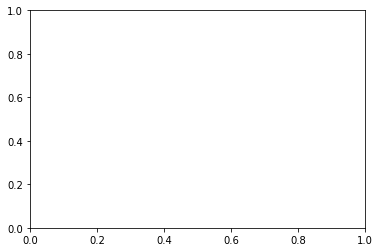

In [45]:
tklc.Plot_Lightcurve()

In [42]:
Simulate_DE_Lightcurve?

In [21]:
Simulate_DE_Lightcurve?

In [35]:
# simulate artificial light curve with Emmanoulopoulos method, scipy distribution
delc2 = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                                ([st.gamma,st.lognorm],[[kappa,0, theta],\
                                    [lnsig,0, np.exp(lnmu)]],[weight,1-weight]),
                               lightcurve=datalc,
                              )



In [39]:
# simulate artificial light curve with Emmanoulopoulos method, custom distribution
delc3 = Simulate_DE_Lightcurve(BendingPL, (A,v_bend,a_low,a_high,c),
                                ([[st.gamma,st.lognorm],[[kappa, theta],\
                                  [lnmu, lnsig]],[weight,1-weight]]),
                               #MixtureDist,
                               lightcurve=datalc)                                


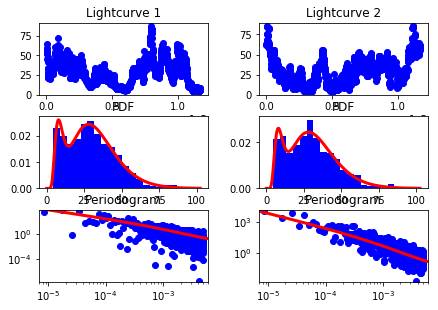

In [34]:
# plot lightcurves and their PSDs ands PDFs for comparison
#Comparison_Plots([datalc,tklc,delc])

Comparison_Plots([datalc,delc])

In [12]:
# Save lightcurve and Periodogram as text files
delc.Save_Lightcurve('lightcurve.dat')
delc.Save_Periodogram('periodogram.dat')